In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/MyDrive/WD Community Project/Project Documents (Housing-python)'
!ls "$path"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Housing_marketEDA.ipynb  MY_states_districts.csv  OpenTransactionData.csv


In [3]:
# Function to try and read files with different encodings
import chardet

def load_csv_with_encoding(file_path):
    encodings = ['utf-8', 'ISO-8859-1', 'cp1252', 'latin1']

    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Successfully read with encoding: {encoding}")
            return df
        except UnicodeDecodeError:
            continue

    # If all else fails, use chardet
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())

    try:
        df = pd.read_csv(file_path, encoding=result['encoding'])
        print(f"Successfully read with detected encoding: {result['encoding']}")
        return df
    except Exception as e:
        print(f"Failed to read file. Error: {e}")
        return None

In [41]:
# use the function to read CSV data
df_raw = load_csv_with_encoding(path + '/OpenTransactionData.csv')
    #df_raw is exactly the same as the source file
df = df_raw
    #df is something we'll keep making changes on. if anything fails, we can always return here and restart
if df is not None:
    print(df.head())

Successfully read with encoding: utf-8
                    Property Type    District             Mukim  \
0  1 - 1 1/2 Storey Semi-Detached  Alor Gajah  Bdr Masjid Tanah   
1  1 - 1 1/2 Storey Semi-Detached  Alor Gajah         Belimbing   
2  1 - 1 1/2 Storey Semi-Detached  Alor Gajah         Belimbing   
3  1 - 1 1/2 Storey Semi-Detached  Alor Gajah         Belimbing   
4  1 - 1 1/2 Storey Semi-Detached  Alor Gajah         Belimbing   

         Scheme Name/Area                        Road Name  \
0  TMN BUKIT INDAH FASA 2                JLN BUKIT INDAH 6   
1   TMN BELIMBING HARMONI            JLN BELIMBING HARMONI   
2     TMN VISTA BELIMBING  JALAN DURIAN TUNGGAL-ALOR GAJAH   
3     TMN VISTA BELIMBING  JALAN DURIAN TUNGGAL-ALOR GAJAH   
4     TMN VISTA BELIMBING  JALAN DURIAN TUNGGAL-ALOR GAJAH   

  Month, Year of Transaction Date     Tenure Land/Parcel Area  Unit  \
0                      March 2024   Freehold              374  sq.m   
1                        May 2023  Leasehol

/tmp/ipython-input-1085590914.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


In [42]:
# use the function to read CSV data
states_raw = load_csv_with_encoding(path + '/MY_states_districts.csv')
    #states_raw is exactly the same as the source file
states_df = states_raw
     #if anything fails, we can always return here and restart
if states_df is not None:
    print(states_df.head())

Successfully read with encoding: utf-8
        Federal Territory/State District Name Capital/Largest settlement  \
0  Federal Territory (Malaysia)  Kuala Lumpur               Kuala Lumpur   
1  Federal Territory (Malaysia)     Putrajaya                  Putrajaya   
2                         Johor    Batu Pahat                 Batu Pahat   
3                         Johor   Johor Bahru                Johor Bahru   
4                         Johor        Kluang                     Kluang   

                                            Council  Population (2020)  \
0                                    Kuala Lumpur H          1982112.0   
1                                       Putrajaya P           109202.0   
2                         Batu Pahat M\nYong Peng D           495338.0   
3  Johor Bahru C\nIskandar Puteri C\nPasir Gudang C          1711191.0   
4                       Kluang M\nSimpang Renggam D           323762.0   

   Area (km2)   Density  
0       243.0  8,156.80  
1      

In [43]:
df.shape

(375904, 13)

In [44]:
df.head(10)

,Property Type,District,Mukim,Scheme Name/Area,Road Name,"Month, Year of Transaction Date",Tenure,Land/Parcel Area,Unit,Main Floor Area,Unit.1,Unit Level,Transaction Price
0,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Bdr Masjid Tanah,TMN BUKIT INDAH FASA 2,JLN BUKIT INDAH 6,March 2024,Freehold,374,sq.m,106,sq.m,NaN,"RM470,000.00"
1,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN BELIMBING HARMONI,JLN BELIMBING HARMONI,May 2023,Leasehold,234,sq.m,67,sq.m,NaN,"RM483,000.00"
2,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM359,000.00"
3,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM435,000.00"
4,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,297,sq.m,118,sq.m,NaN,"RM373,000.00"
5,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,May 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM435,000.00"
6,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,May 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM658,000.00"
7,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,May 2021,Freehold,297,sq.m,118,sq.m,NaN,"RM458,000.00"
8,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,May 2021,Freehold,331,sq.m,118,sq.m,NaN,"RM460,000.00"
9,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,May 2021,Freehold,387,sq.m,118,sq.m,NaN,"RM494,000.00"


In [45]:
df.tail(10)

,Property Type,District,Mukim,Scheme Name/Area,Road Name,"Month, Year of Transaction Date",Tenure,Land/Parcel Area,Unit,Main Floor Area,Unit.1,Unit Level,Transaction Price
375894,Town House,Timur Laut,Tanjung Bungah,MOUNT EVERGREEN,NaN,January 2023,Freehold,93,sq.m,-,-,1,"RM465,000.00"
375895,Town House,Timur Laut,Tanjung Bungah,MOUNT EVERGREEN,NaN,May 2023,Freehold,78,sq.m,-,-,G,"RM465,000.00"
375896,Town House,Timur Laut,Tanjung Bungah,MOUNT EVERGREEN,NaN,June 2023,Freehold,87,sq.m,-,-,1,"RM650,000.00"
375897,Town House,Timur Laut,Tanjung Bungah,MOUNT EVERGREEN,NaN,June 2023,Freehold,87,sq.m,-,-,G,"RM650,000.00"
375898,Town House,Timur Laut,Tanjung Bungah,MOUNT EVERGREEN,NaN,August 2024,Freehold,86,sq.m,-,-,1,"RM410,000.00"
375899,Town House,Timur Laut,Tanjung Tokong,TANJONG PARK,NaN,July 2024,Freehold,67,sq.m,-,-,4,"RM479,000.00"
375900,Town House,Timur Laut,Tanjung Tokong,TANJONG PARK,NaN,July 2024,Freehold,114,sq.m,-,-,3,"RM721,000.00"
375901,Town House,Timur Laut,Tanjung Tokong,TANJONG VILLA,NaN,August 2022,Freehold,103,sq.m,-,-,1,"RM850,000.00"
375902,Town House,Timur Laut,Tanjung Tokong,TANJONG VILLA,NaN,February 2024,Freehold,174,sq.m,-,-,1,"RM1,110,000.00"
375903,Town House,Timur Laut,Tanjung Tokong,VILLA BUNGA TELANG,NaN,July 2023,Freehold,83,sq.m,-,-,3,"RM540,000.00"


In [46]:
df.columns

Index(['Property Type', 'District', 'Mukim', 'Scheme Name/Area', 'Road Name',
       'Month, Year of Transaction Date', 'Tenure', 'Land/Parcel Area', 'Unit',
       'Main Floor Area', 'Unit.1', 'Unit Level', 'Transaction Price'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375904 entries, 0 to 375903
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Property Type                    375904 non-null  object
 1   District                         375904 non-null  object
 2   Mukim                            375904 non-null  object
 3   Scheme Name/Area                 375904 non-null  object
 4   Road Name                        277444 non-null  object
 5   Month, Year of Transaction Date  375904 non-null  object
 6   Tenure                           375904 non-null  object
 7   Land/Parcel Area                 375904 non-null  object
 8   Unit                             375904 non-null  object
 9   Main Floor Area                  375904 non-null  object
 10  Unit.1                           375904 non-null  object
 11  Unit Level                       98445 non-null   object
 12  Transaction Pric

In [48]:
states_df.head()

,Federal Territory/State,District Name,Capital/Largest settlement,Council,Population (2020),Area (km2),Density
0,Federal Territory (Malaysia),Kuala Lumpur,Kuala Lumpur,Kuala Lumpur H,1982112.0,243.0,"8,156.80"
1,Federal Territory (Malaysia),Putrajaya,Putrajaya,Putrajaya P,109202.0,49.0,"2,228.60"
2,Johor,Batu Pahat,Batu Pahat,Batu Pahat M\nYong Peng D,495338.0,1966.0,252
3,Johor,Johor Bahru,Johor Bahru,Johor Bahru C\nIskandar Puteri C\nPasir Gudang C,1711191.0,1066.0,"1,605.20"
4,Johor,Kluang,Kluang,Kluang M\nSimpang Renggam D,323762.0,2865.0,113


# Data cleaning

In [49]:
# rename columns
states_df = states_df.rename(columns={"Federal Territory/State":"state",
                    "District Name":"district_name",
                    "Capital/Largest settlement":"capital",
                    "Council":"council",
                    "Population (2020)":"population",
                    "Area (km2)":"area_sqkm",
                    "Density":"density"
})


states_df['state'] = states_df['state'].replace({
                            "Malacca":"Melaka",
                            "Federal Territory (Malaysia)": "Kuala Lumpur"
                           })

df=df.rename(columns={
                   "Property Type":"property_type",
                   "District":"district",
                   "Mukim":"mukim",
                   "Scheme Name/Area":"scheme_name",
                   "Road Name":"road_name",
                   "Month, Year of Transaction Date":"transaction_m_y",
                   "Tenure":"tenure",
                   "Land/Parcel Area":"land_parcel_area",
                   "Unit":"unit_land",
                   "Main Floor Area":"main_floor_area",
                   "Unit.1":"unit_floor",
                   "Unit Level":"unit_level",
                   "Transaction Price":"transaction_price"
})

# Create a lookup dataframe
correct_district = pd.DataFrame([
    {"Old": "Bandar Baru", "New": "Bandar Baharu", "Issue": "misspell"},
    {"Old": "Cameron Highland", "New": "Cameron Highlands", "Issue": "misspell"},
    {"Old": "Kota Bahru", "New": "Kota Bharu", "Issue": "misspell"},
    {"Old": "RoMPin", "New": "Rompin", "Issue": "misspell"},
    {"Old": "Selama", "New": "Larut Matang, Selama", "Issue": "combined district"},
    {"Old": "Larut Matang", "New": "Larut Matang, Selama", "Issue": "combined district"},
    {"Old": "Labuk Sugut", "New": "Beluran", "Issue": "Now it is considered as Beluran"}
])


property_mapping = pd.DataFrame({
    'property_type': [
        '1 - 1 1/2 Storey Semi-Detached',
        '1 - 1 1/2 Storey Terraced',
        '2 - 2 1/2 Storey Semi-Detached',
        '2 - 2 1/2 Storey Terraced',
        'Cluster House',
        'Detached',
        'Low-Cost House',
        'Town House',
        'Condominium/Apartment',
        'Flat',
        'Low-Cost Flat'
    ],
    'property_category': [
        'Landed','Landed','Landed','Landed',
        'Landed','Landed','Landed','Landed',
        'High-Rise','High-Rise','High-Rise'
    ]
})

# Create a dictionary from the correction table
replace_dict = dict(zip(correct_district['Old'], correct_district['New']))
df['district'] = df['district'].str.replace('Bahagian', '', regex=False).replace(replace_dict)

In [52]:
df.head(5)

,property_type,district,mukim,scheme_name,road_name,transaction_m_y,tenure,land_parcel_area,unit_land,main_floor_area,unit_floor,unit_level,transaction_price
0,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Bdr Masjid Tanah,TMN BUKIT INDAH FASA 2,JLN BUKIT INDAH 6,March 2024,Freehold,374,sq.m,106,sq.m,NaN,"RM470,000.00"
1,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN BELIMBING HARMONI,JLN BELIMBING HARMONI,May 2023,Leasehold,234,sq.m,67,sq.m,NaN,"RM483,000.00"
2,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM359,000.00"
3,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268,sq.m,118,sq.m,NaN,"RM435,000.00"
4,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,297,sq.m,118,sq.m,NaN,"RM373,000.00"


In [56]:
states_df[states_df['state'].isin(['Melaka', 'Kuala Lumpur'])]

,state,district_name,capital,council,population,area_sqkm,density
0,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur H,1982112.0,243.0,"8,156.80"
1,Kuala Lumpur,Putrajaya,Putrajaya,Putrajaya P,109202.0,49.0,"2,228.60"
34,Melaka,Alor Gajah,Alor Gajah,Alor Gajah M\nHang Tuah Jaya M,249356.0,674.0,370
35,Melaka,Jasin,Jasin,Jasin M\nHang Tuah Jaya M,151937.0,679.0,223.8
36,Melaka,Melaka Tengah,Malacca City,Malacca C\nHang Tuah Jaya M,597135.0,359.0,"1,663.30"
90,Kuala Lumpur,Labuan,Victoria,Labuan C,95120.0,92.0,"1,033.90"


In [57]:
# Create a new 'transaction_price' column by removing 'RM' and ',' in original column
df['transaction_price'] = df['transaction_price'] \
                          .str.split('RM') \
                          .str[1] \
                          .str.replace(',', '')

df['transaction_price']

,transaction_price
0,470000.00
1,483000.00
2,359000.00
3,435000.00
4,373000.00
...,...
375899,479000.00
375900,721000.00
375901,850000.00
375902,1110000.00


In [58]:
df[['main_floor_area', 'unit_land']].head()

,main_floor_area,unit_land
0,106,sq.m
1,67,sq.m
2,118,sq.m
3,118,sq.m
4,118,sq.m


In [59]:
df["land_parcel_area"] = pd.to_numeric(df["land_parcel_area"], errors='coerce')
df["main_floor_area"] = pd.to_numeric(df["main_floor_area"], errors='coerce')
df["transaction_price"] = pd.to_numeric(df["transaction_price"], errors='coerce')

# convert from sqm to sqft
df['main_floor_area_sqft'] = df['main_floor_area'] * 10.764

df['district'] = df['district'].str.replace('Bahagian ', '', regex=False).replace(replace_dict)

# create a new date column based on transaction_m_y = {'March 2024', 'April 2021',....}
df['transaction_date'] = pd.to_datetime(df['transaction_m_y'], format='%B %Y')
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_year'] = df['transaction_date'].dt.year

In [63]:
df[['transaction_date', 'transaction_month', 'transaction_year']].head()

,transaction_date,transaction_month,transaction_year
0,2024-03-01,3,2024
1,2023-05-01,5,2023
2,2021-04-01,4,2021
3,2021-04-01,4,2021
4,2021-04-01,4,2021


In [64]:
# get the number of duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 1455


In [65]:
df_nodup = df.drop_duplicates().copy()

# merge with state info
master_df = pd.merge(
    df_nodup,
    states_df[['district_name','state']],
    left_on='district',
    right_on='district_name',
    how='left'
)

# merge with property type
master_df = pd.merge(master_df, property_mapping, on='property_type', how='left')

# create region disctionary
region_mapping = {
    # Central Region
    'Kuala Lumpur': 'Wilayah/Zon Tengah',
    'Selangor': 'Wilayah/Zon Tengah',
    'Negeri Sembilan': 'Wilayah/Zon Tengah',
    # Northern Region
    'Penang': 'Utara',
    'Kedah': 'Utara',
    'Perak': 'Utara',
    'Perlis': 'Utara',
    # Southern Region
    'Johor': 'Selatan',
    'Melaka': 'Selatan',
    # East Coast
    'Pahang': 'Pantai Timur',
    'Terengganu': 'Pantai Timur',
    'Kelantan': 'Pantai Timur',
    # East Malaysia
    'Sabah': 'Borneo',
    'Sarawak': 'Borneo'
}

# create new 'region' column
master_df['region'] = master_df['state'].map(region_mapping)

In [66]:
master_df.head()

,property_type,district,mukim,scheme_name,road_name,transaction_m_y,tenure,land_parcel_area,unit_land,main_floor_area,...,unit_level,transaction_price,main_floor_area_sqft,transaction_date,transaction_month,transaction_year,district_name,state,property_category,region
0,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Bdr Masjid Tanah,TMN BUKIT INDAH FASA 2,JLN BUKIT INDAH 6,March 2024,Freehold,374.0,sq.m,106.0,...,NaN,470000.0,1140.984,2024-03-01,3,2024,Alor Gajah,Melaka,Landed,Selatan
1,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN BELIMBING HARMONI,JLN BELIMBING HARMONI,May 2023,Leasehold,234.0,sq.m,67.0,...,NaN,483000.0,721.188,2023-05-01,5,2023,Alor Gajah,Melaka,Landed,Selatan
2,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268.0,sq.m,118.0,...,NaN,359000.0,1270.152,2021-04-01,4,2021,Alor Gajah,Melaka,Landed,Selatan
3,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,268.0,sq.m,118.0,...,NaN,435000.0,1270.152,2021-04-01,4,2021,Alor Gajah,Melaka,Landed,Selatan
4,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,April 2021,Freehold,297.0,sq.m,118.0,...,NaN,373000.0,1270.152,2021-04-01,4,2021,Alor Gajah,Melaka,Landed,Selatan


### How do house prices differ across states?

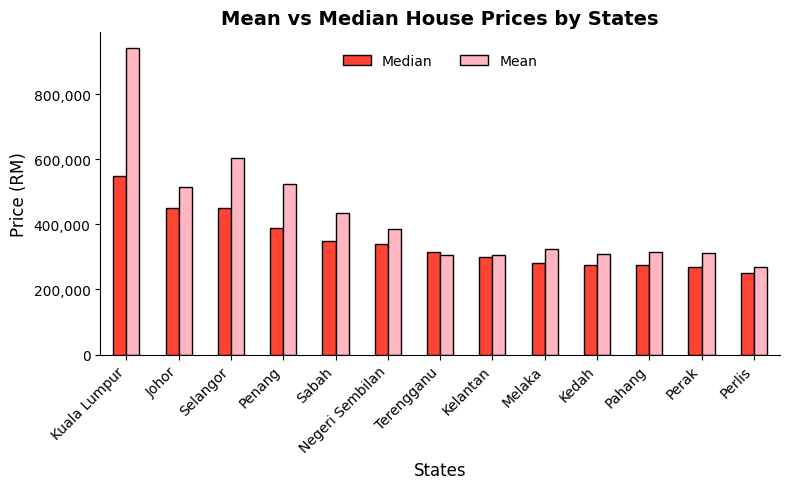

In [67]:
colors = ['#FF4433','#FFB6C1']

state_price_summary = (master_df
                       .groupby('state')
                       .agg(Median=('transaction_price', 'median'), Mean=('transaction_price', 'mean'))
                       .reset_index()
                       .sort_values("Median", ascending=False)
                       )

ax = state_price_summary.plot(x="state",
                              kind="bar",
                              figsize=(8,5),
                              color=colors,
                              edgecolor="black")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Mean vs Median House Prices by States', fontsize=14, weight='bold')
plt.ylabel('Price (RM)', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 0.85),
    ncol=2,
    frameon=False
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###2. Average price by state and property type (detailed breakdown from 1)

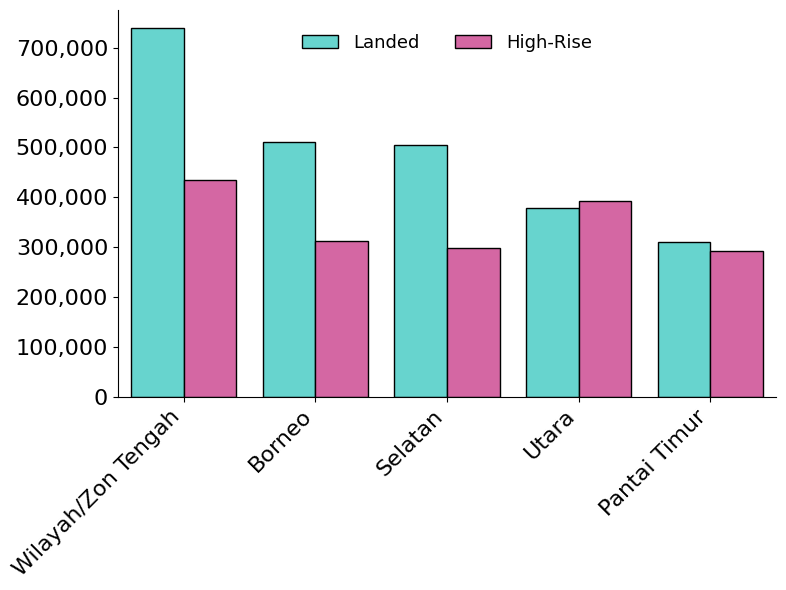

In [68]:
palette = ['#55E6DE','#E655A5']

price_barchart = (
                  master_df.groupby(['region','property_category'])
                  .agg(average=('transaction_price','mean'))
                  .round(2)
                  .reset_index()
                  .sort_values('average', ascending=False)
                  )

plt.figure(figsize=(8,6))
ax = sns.barplot(price_barchart,
                 x='region',
                 y='average',
                 hue='property_category',
                 palette=palette,
                 edgecolor="black"
                )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title('Average House Prices by Region & Property Type', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 0.85),
    ncol=2,
    fontsize=13,
    frameon=False
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Across most regions, landed properties are preferred over high-rise, with Wilayah/Zon Tengah standing out for having the highest average landed property price

### 3. Which are the top 10 districts with the highest house prices?

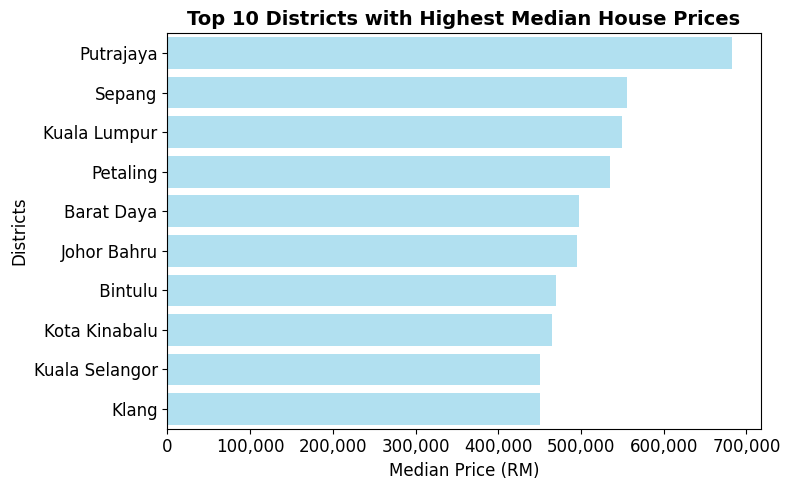

In [70]:
top_district = (
    master_df
    .groupby('district')['transaction_price']
    .median()
    .reset_index()
    .sort_values(by='transaction_price', ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=top_district,
    x='transaction_price',
    y='district',
    color='#A7E5FA',
)


plt.title("Top 10 Districts with Highest Median House Prices", fontsize=14, weight='bold')
plt.xlabel("Median Price (RM)", fontsize=12)
plt.ylabel("Districts", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Which states are experiencing the highest property demand? (transaction count)

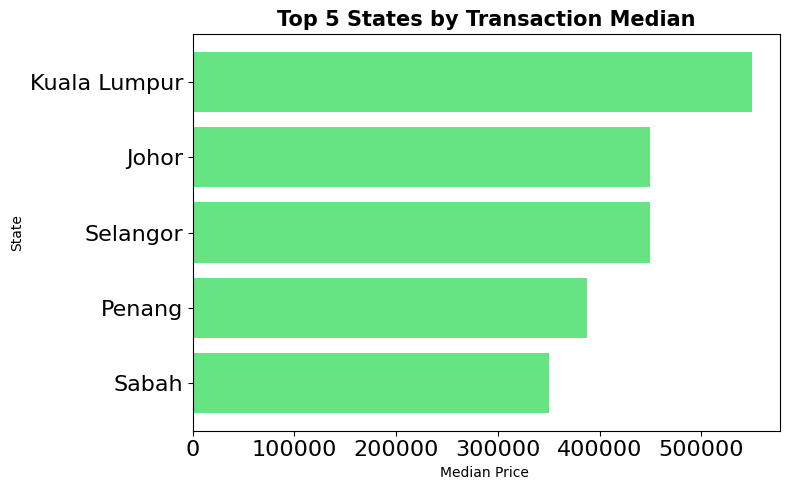

In [71]:
top_states = (master_df
              .groupby('state').agg(transaction_median=('transaction_price', 'median'))
              .reset_index()
              .sort_values(by='transaction_median', ascending=False)
              .head())

plt.figure(figsize=(8,5))
plt.barh(
    top_states['state'],
    top_states['transaction_median'],
    color='#66E382'
)

# Invert y-axis so the highest value is at the top
plt.gca().invert_yaxis()

plt.xlabel("Median Price ")
plt.ylabel("State")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Top 5 States by Transaction Median", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

###5. How do house price trends differ by property type (landed vs high-rise)?

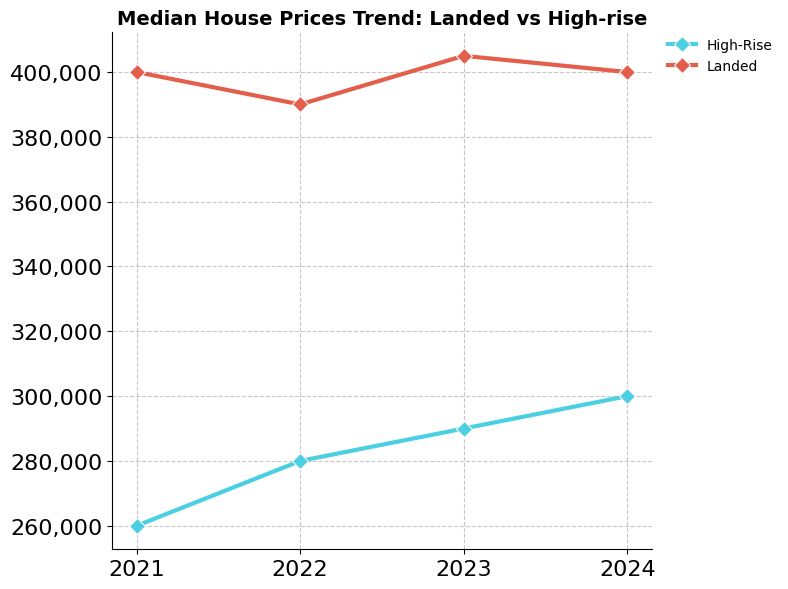

In [72]:
colors = ['#4BCFE3', '#E35F4B']
property_trend = (master_df
                  .groupby(['transaction_year', 'property_category'])
                  .agg(median_price=('transaction_price', 'median'))
                  .reset_index())


plt.figure(figsize=(8,6))
ax = sns.lineplot(
    data=property_trend,
    x='transaction_year',
    y='median_price',
    hue='property_category',
    palette=colors,
    linewidth=3,
    marker='D',
   markersize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Median House Prices Trend: Landed vs High-rise', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(master_df['transaction_year'].unique(), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    frameon=False
)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, which='major', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###6. How does property size preference vary by price range?

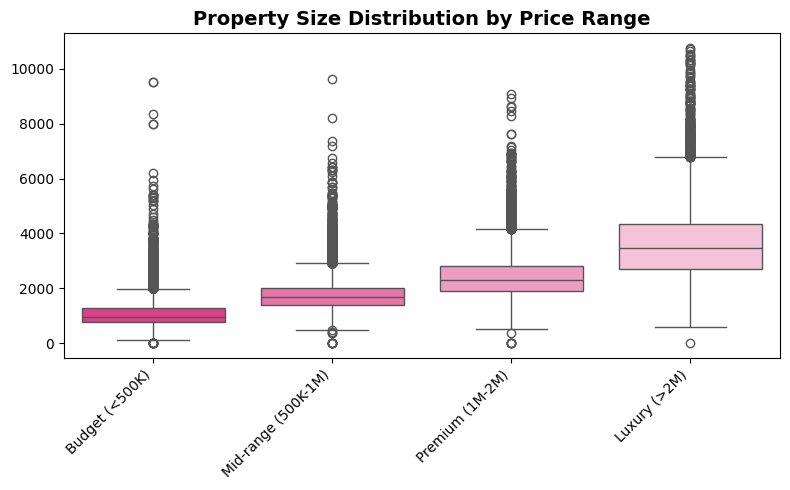

In [73]:
palette=['#F52787', '#F863A8', '#FA8FC1', '#FCBBD9']

master_df['price_range'] = pd.cut(master_df['transaction_price'],
                                   bins=[0, 500000, 1000000, 2000000, float('inf')],
                                   labels=['Budget (<500K)', 'Mid-range (500K-1M)',
                                           'Premium (1M-2M)', 'Luxury (>2M)'])

# size_by_price = master_df.groupby('price_range')['main_floor_area_sqft'].agg(['mean', 'median', 'count'])

plt.figure(figsize=(8,5))
ax = sns.boxplot(data=master_df,
                 x='price_range',
                 y='main_floor_area_sqft',
                 hue='price_range',
                 palette=palette,
                 legend=False)

plt.title("Property Size Distribution by Price Range", fontsize=14, weight='bold')
# plt.xlabel('Price Range (RM)', fontsize=12)
# plt.ylabel('Main Floor Area (sq ft)', fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Observations:
- As price increases → property size generally increases.
- The outliers reflect market diversity, showing that property prices in Malaysia are not determined by size alone but are also influenced by other factors such as location, property type, facilities, and overall demand.

### 11. What percentage of properties fall within different price ranges?

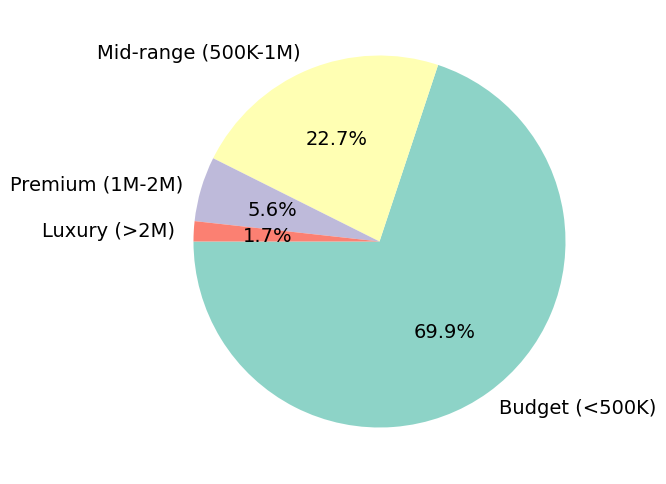

In [74]:
price_dist = master_df['price_range'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,7))
plt.pie(
    price_dist,
    labels=price_dist.index,
    autopct='%1.1f%%',
    startangle=180,
    textprops={'fontsize': 14},
    colors=plt.cm.Set3.colors
)
plt.show()

###How does the house price change across different quarters of the year, and is there any seasonality in the housing market?

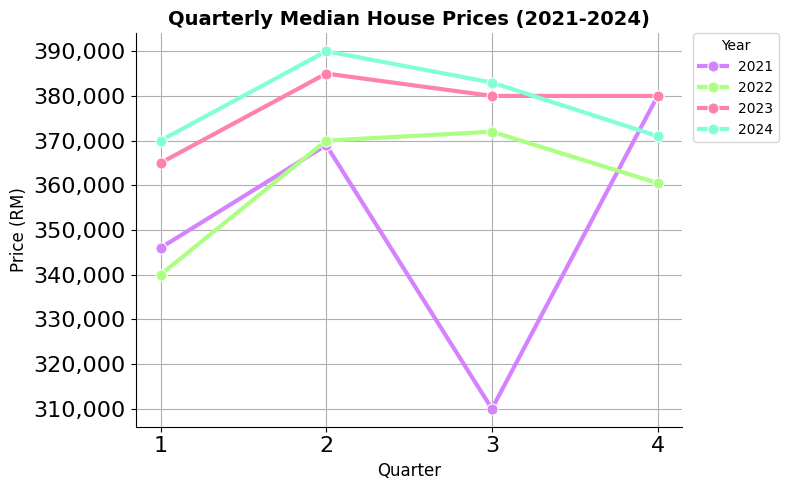

In [75]:
colors = ['#D582FF', '#ACFF82', '#FF82AC', '#82FFD5']

master_df['transaction_quarter'] = master_df['transaction_date'].dt.quarter

price_by_quarter = (master_df
                    .groupby(['transaction_year','transaction_quarter'])['transaction_price']
                    .median()
                    .reset_index()
                    .sort_values(by='transaction_year'))

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=price_by_quarter,
                   x='transaction_quarter',
                   y='transaction_price',
                   hue='transaction_year',
                   palette=colors,
                   linewidth=3,
                   marker='o',
                   markersize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Quarterly Median House Prices (2021-2024)', fontsize=14, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)
plt.xticks(master_df['transaction_quarter'].unique(), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(
    title='Year',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.tight_layout()
plt.show()